# About

**Background** 
   
Term deposit products play a critical role in supporting the bank’s funding stability. Each year, marketing campaigns are conducted through telemarketing to acquire new customers. However, historical performance shows that mass outreach is becoming increasingly inefficient: response rates are declining, operational costs are rising, and traditional segmentation methods are no longer sufficient to capture the complexity of customer behavior.

In the telemarketing industry, the cost per calls varies but with campaign volumes reaching tens of thousands of calls, inaccurate targeting can lead to operational losses reaching tens or even hundreds of millions of rupiah in a single campaign cycle. Beyond financial implications, repeated contact with low-potential customers increases the risk of customer fatigue, potentially affecting overall brand perception.

Historical campaign data indicates that a customer’s likelihood of subscribing to a term deposit is influenced by multiple interacting factors—financial profile, loan history, communication preferences, and previous campaign outcomes. This complexity requires a more precise, data-driven approach rather than intuition-based or manual segmentation.

Given these challenges, the development of a Machine Learning model becomes a strategic and urgent initiative. By predicting subscription probability at the individual customer level, such a model can:
- Reduce campaign costs
- Improve targeting accuracy
- Optimize the productivity of marketing and sales teams
- Direct promotional efforts toward high-potential customer segments  

Implementing a predictive model is not simply a technological enhancement; it is a strategic investment that strengthens marketing effectiveness, increases deposit acquisition, and supports the bank’s long-term growth objectives.

**Term Deposit Definition**
  
Term deposit is a financial product offered by banks which mechanism is that a customer deposits a sum of money at the bank which can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited. In this case, the bank is trying to acquire new customers through a telemarketing campaign. 
  
The amount of money required to subscribe to a term deposit product varies from bank to bank. Permata Bank, for example, offers a term deposit with the minimum deposit of 10 million rupiahs while BCA and BTN offer a minimum deposits of 8 million and 5 million rupiahs respectively. With no context on how much money is required for a term deposit in our case, we could take the numbers before and put an estimate between **5-10 million rupiahs** as a minimum amount that each customer would have to deposit.

**Goals**  
  
The goal of this project is to build a predictive model that can identify customers who are likely to subscribe to the bank’s deposit product, enabling more effective and targeted marketing campaigns.

**Stakeholders** 
   
The main stakeholders in this case are:  
- The marketing department, who benefits the most from this project as they could use the prediction to target customers more effectively.
- The sales department, who could save cost, time, and effort by prioritizing customers with high subscription probability.
- The product team, who could use the insight to better adjust their deposit product.
- The executives, since higher deposit subscriptions would means a higher potential bank revenue.

# Imports and Data Read

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score

import shap

import warnings
warnings.filterwarnings('ignore')

c:\Users\Karnegion\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("data_bank_marketing_campaign.csv")
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


# Features Description

**Customer profile**
-	age
-	job
-	balance
-	housing
-	loan

**Marketing data**
-	contact: Contact communication type.
-	month: Last contact month of the year.
-	campaign: Number of contacts performed during this campaign and for this client.
-	pdays: Number of days after the client was contacted from the previous campaign.
-	poutcome: Outcome of the previous marketing campaign.
-	deposit: Whether the customer deposits or not.


# Data Cleaning & Understanding

**Missing Values Check**

In [3]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

As we could see here, our dataset has no missing value, thus we wouldn't have to deal with any missing values in the dataset

**Duplicate Check**

In [4]:
df.duplicated().sum()

np.int64(8)

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Our dataset has a small amount of duplicates which we could safely drop.

**Age**

In [6]:
print(f"Lowest age: {df["age"].min()}, highest age: {df["age"].max()}")

Lowest age: 18, highest age: 95


In this code we are checking at which age are the lowest and which age are highest in our current dataset.

**Job**

In [7]:
df["job"].value_counts()

job
management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

Here we could see what kind of jobs that the customers have on our dataset.

**Balance**

In [8]:
print(f"Lowest balance: {df["balance"].min()}, highest balance: {df["balance"].max()}")

Lowest balance: -6847, highest balance: 66653


Here we could see the maximum and minimum amount of money available in the customer's balance.

**Housing**

In [9]:
df["housing"].value_counts()

housing
no     4136
yes    3669
Name: count, dtype: int64

In [10]:
pd.crosstab(df["housing"], df["deposit"], normalize="index")

deposit,no,yes
housing,,
no,0.422631,0.577369
yes,0.634233,0.365767


Here we could see that people who have do not have housing are more likely to deposit.

**Loan**

In [11]:
df["loan"].value_counts()

loan
no     6781
yes    1024
Name: count, dtype: int64

In [12]:
pd.crosstab(df["loan"], df["deposit"], normalize="index")

deposit,no,yes
loan,,
no,0.498599,0.501401
yes,0.677734,0.322266


Here we could see that people who do not have loans are more likely to deposit.

**Contact**

In [13]:
df["contact"].value_counts()

contact
cellular     5623
unknown      1636
telephone     546
Name: count, dtype: int64

This shows which type of communication is used in the telemarketing campaign.

**Month**

In [14]:
df["month"].value_counts()

month
may    1973
aug    1081
jul    1049
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: count, dtype: int64

This shows at what month did the call happens.

**Campaign**

In [15]:
print(f"Lowest contacts: {df["campaign"].min()}, highest contacts: {df["campaign"].max()}")

Lowest contacts: 1, highest contacts: 63


Here we could see that each customer in the dataset is being contacted at least once and at most 63 times during the campaign.

**Pdays**

In [16]:
print(f"Earliest contacts: {df["pdays"].min()}, latest contacts: {df["pdays"].max()}")

Earliest contacts: -1, latest contacts: 854


In [17]:
df["pdays"].value_counts()

pdays
-1      5809
 92       80
 91       62
 182      61
 181      56
        ... 
 728       1
 717       1
 535       1
 422       1
 155       1
Name: count, Length: 422, dtype: int64

The pdays variable shows how long since the previous campaign was the customer get contacted in days.  
  
The -1 entries means that the customer has never been contacted before (which means they are not included in the previous campaign). This could cause some problem in the analysis since some machine learning model would prefer to have the number as it is (such as Decision Tree model) while some models are more sensitive to it (such as Logistic Regression).  
  
Thus, we are going to make a new column which separates customer who are included in previos campaign and those who did not.

Also, notice that the number of "-1" in the pdays almost match the number of "unknown" in poutcome, signifying that those are the customers not included in previous campaign.

**Poutcome**

In [18]:
df["poutcome"].value_counts()

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64

In [19]:
pd.crosstab(df["poutcome"], df["deposit"], normalize="index")

deposit,no,yes
poutcome,,
failure,0.487028,0.512972
other,0.412987,0.587013
success,0.085414,0.914586
unknown,0.591637,0.408363


Here we could see that the people whose outcome in previous campaign was a success are more likely to deposit in the current campaign.

**Pcampaign**

Here, we separate the customers who are included in previous campaign as 1 and thos who didn't as 0

In [20]:
df["pcampaign"] = ((df["pdays"] != -1) | (df["poutcome"] != "unknown")).astype(int)
df["pcampaign"].value_counts()

pcampaign
0    5809
1    1996
Name: count, dtype: int64

In [21]:
pd.crosstab(df["pcampaign"], df["deposit"], normalize="index")

deposit,no,yes
pcampaign,,
0,0.591840,0.408160
1,0.319138,0.680862


Here we could see that people who are included in the previous campaign are more likely to deposit.

**Deposit**

In [22]:
df["deposit"].value_counts()

deposit
no     4075
yes    3730
Name: count, dtype: int64

Here we could see the result of the campaign.  
  
For the analysis purpose, deposit would be changed from YES and NO -> 1 and 0

In [23]:
df["deposit"] = df["deposit"].map({"yes": 1, "no": 0})
df["deposit"].value_counts()

deposit
0    4075
1    3730
Name: count, dtype: int64

In [24]:
df["deposit"].value_counts() / len(df) * 100

deposit
0    52.210122
1    47.789878
Name: count, dtype: float64

# Metrics Decision

These are the possible failures that could be caused from the prediction : 
  
- False Negative : Prediction says the potential customer would not subscribe but actually they would. This failure could cause a loss of potential customer who would have subscribed and a potential earning of deposit for each customer in the estimation of **5-10 million rupiahs**. Here, we assume an average of **7 million rupiahs** per successful outcome. 
  
- False Positive : Prediction says the potential customer would subscribe but actually they wouldn't. This failure could cause a waste of marketing budget, time, and effort. As for the loss, it is hard to pinpoint a specific number as it depends on how the bank runs its telemarketing (in-house vs outsourcing, length of call, other included costs (monitoring, training, follow-ups, retries), etc.). But as a baseline, we could set an estimate of **IDR 1000 to IDR 2000** for each call and **IDR 20.000 to IDR 40.000** for each qualified lead (successful deposit-interest, appointment set, etc.) which are lengthier and more numerous calls. However, as we need only the cost for our false positive case, we could safely assume the cost would be **IDR 1500** per failed call.
  
It is hard to pinpoint which kind of failure would be worse as we have no further information about the campaign (depending on how much budget was allocated and how significant it is towards the bank's overall finance). With that said, we decided to treat both failures as equal and therefore we decided to use **F1 score** as the metric for our model evaluation.  
  
**F1 Score** is a metric that combines **precision** and **recall** into a single number. It is the harmonic mean of precision and recall. The formula in detail goes like this :  
  
**F1 = 2 * ((precision * recall) / (precision + recall))**
  
The combination of those 2 metrics is what makes f1 score a good metric used when we're unsure whether False Positive or False Negative is the most important to handle.

# Train Test Split

In [25]:
x = df.drop("deposit", axis=1)
y = df["deposit"]

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y,
    random_state=42,
    test_size=0.2,
    stratify=y
)

# Pre Processing

**Outliers Check**

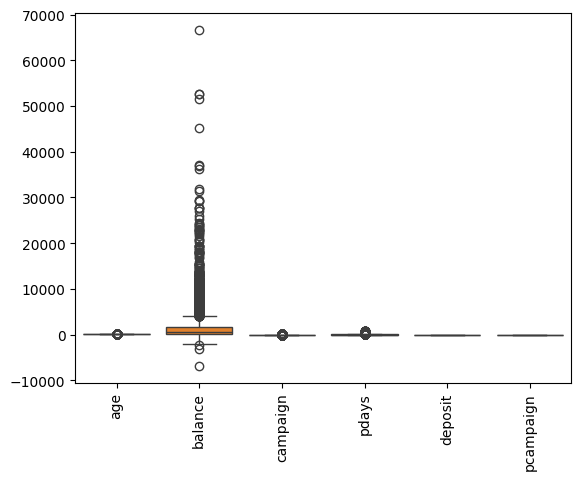

In [26]:
sns.boxplot(
    data=df
)

plt.xticks(rotation=90)
plt.show()

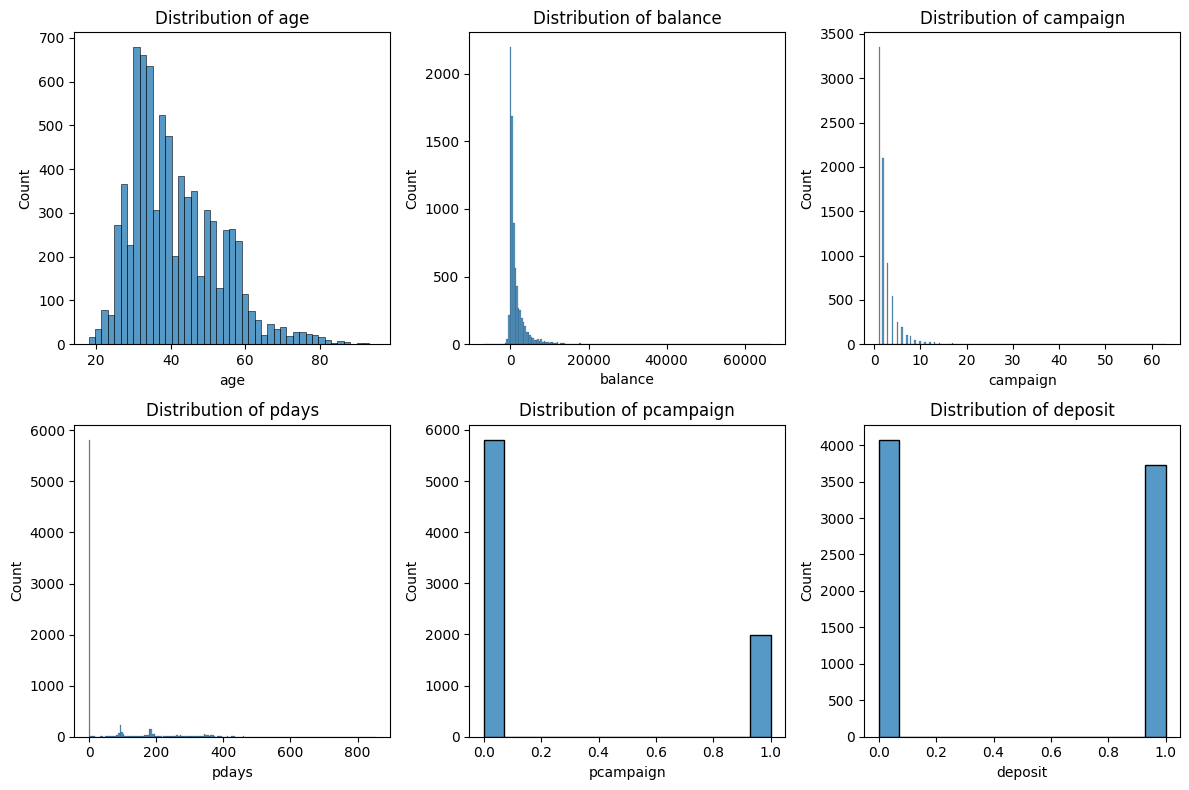

In [27]:
cols = ["age", "balance", "campaign", "pdays", "pcampaign", "deposit"]

plt.figure(figsize=(12, 8))

for idx, col in enumerate(cols, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(data=df, x=col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

As we can see in the charts above, almost all of the variables with the exception of deposit, have a skewed spread. Thus we would use robust scaler as our scaler for the preprocessing step.

**Encoders Decision**

As for the categorical variables, we are going to encode each of the variables with an encoder that most suits each characteristics.  
  
- **One Hot Encoding :**  
**Contact, Housing, Loan**  
These 3 variables are going to be encoded as those variables are simpler classifications which have no difference in effect towards the dependent variable between their values and contain only a few different values (yes or no, method of contact, etc).  
  
- **Ordinal Encoding :**  
**Poutcome**  
This variable is a classification but with values that have difference in effect towards the dependent variable between its values and thus should be treated accordingly.  
  
- **Binary Encoding :**  
**Job, Month**  
These variables are a classification with more than 5 different values and thus would be better encoded with binary encoding.

**Preprocessing**

In [28]:
ord = [
    {
        "col": "poutcome",
        "mapping": {"unknown": 0, "failure": 0, "other": 1, "success": 2}
    }
]

oe = ce.OrdinalEncoder(cols=["poutcome"], mapping=ord)

In [29]:
kfold = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)

In [30]:
prepros = ColumnTransformer([
    ("OHE", OneHotEncoder(), ["contact", "housing", "loan"]),
    ("Ordinal Encoding", oe, ["poutcome"]),
    ("Binary Encoding", ce.BinaryEncoder(), ["job", "month"]),
    ("Robust Scaling", RobustScaler(), ["age", "balance", "campaign", "pdays", "pcampaign"])
], remainder="passthrough")

prepros

,transformers,"[('OHE', ...), ('Ordinal Encoding', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


# Benchmarking

In [31]:
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
rf = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True)
bagging = BaggingClassifier(SVC(), n_estimators=100)
adaboost = AdaBoostClassifier(random_state=42, n_estimators=500)
gb = GradientBoostingClassifier(random_state=42, n_estimators=500)
xgb = XGBClassifier(n_estimators=500, random_state=42)
lgbm = LGBMClassifier(random_state=42, n_estimators=500)

hard = VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True))
], voting = 'hard')

soft = VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True))
], voting = 'soft')

stacking = StackingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True))
], final_estimator = RandomForestClassifier(), cv = kfold)

In [32]:
model = [dt, rf, logreg, knn, svm, hard, soft, stacking, bagging, adaboost, gb, xgb, lgbm]
score = []
score_mean = []
score_std = []

for i in model : 
    pipe = Pipeline([
        ('Preprocesing', prepros),
        ('Model', i)
    ])

    cv_score = cross_val_score(pipe,
                               xtrain, ytrain,
                               cv = kfold,
                               scoring = 'f1')

    score.append(cv_score)
    score_mean.append(round(cv_score.mean(),5)) 
    score_std.append(round(cv_score.std(),5))

summary = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'LogReg', 'KNN', 'SVM', 'Hard Voting', 'Soft Voting', 'Stacking', "Bagging (SVM)", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    'Score AVG' : score_mean,
    'Score STD' : score_std
}).sort_values('Score AVG', ascending=False)

[LightGBM] [Info] Number of positive: 2387, number of negative: 2608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 4995, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477878 -> initscore=-0.088546
[LightGBM] [Info] Start training from score -0.088546
[LightGBM] [Info] Number of positive: 2387, number of negative: 2608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 4995, number of used features: 21
[LightGBM] [Info] [binary:

In [33]:
summary

,Model,Score AVG,Score STD
1,Random Forest,0.67024,0.01509
5,Hard Voting,0.66503,0.01257
6,Soft Voting,0.66364,0.01014
9,AdaBoost,0.66126,0.01099
10,Gradient Boosting,0.65722,0.01513
12,LightGBM,0.65420,0.02006
11,XGBoost,0.65236,0.01670
2,LogReg,0.64767,0.00781
8,Bagging (SVM),0.64561,0.02725
7,Stacking,0.64419,0.01313


# Hyperparameter Tuning and Data Test

From the results above, we selected the top three models for further hyperparameter tuning. Those 3 models are **Random Forest, Soft Voting,** and **Hard Voting**.

**Random Forest Tuning**

In [34]:
rf_pipe = Pipeline([
    ("Preprocessing", prepros),
    ("Model", rf)
])

rf_param = {
    'Model__n_estimators': [200, 500],          
    'Model__max_depth': [None, 20],             
    'Model__min_samples_split': [2, 10],        
    'Model__min_samples_leaf': [1, 4],          
    'Model__max_features': ['sqrt'],            
    'Model__class_weight': [None, 'balanced']        
}

rf_grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param,
    scoring="f1",
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'Model__class_weight': [None, 'balanced'], 'Model__max_depth': [None, 20], 'Model__max_features': ['sqrt'], 'Model__min_samples_leaf': [1, 4], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('OHE', ...), ('Ordinal Encoding', ...), ...]"


In [35]:
rf_grid.best_params_

{'Model__class_weight': 'balanced',
 'Model__max_depth': None,
 'Model__max_features': 'sqrt',
 'Model__min_samples_leaf': 1,
 'Model__min_samples_split': 10,
 'Model__n_estimators': 500}

In [36]:
rf_grid.best_score_

np.float64(0.689518722549871)

The hyperparameter tuning for the Random Forest Classifier resulted in an F1 score of **68.95%**, showing a slight improvement over the average performance observed during the benchmarking stage, which is **67.02%**.  

**Random Forest Data Test**

In [37]:
rf_best = rf_grid.best_estimator_

rf_best.fit(xtrain, ytrain)
rf_pred = rf_best.predict(xtest)
f1 = f1_score(ytest, rf_pred)
f1

0.7018284106891702

The data test done using the best random forest parameters shows an F1 score of **70.18%**

**Soft Voting Tuning**

In [38]:
soft_pipe = Pipeline([
    ("Preprocessing", prepros),
    ("Model", soft)
])

soft_param = {
    # VotingClassifier
    'Model__weights': [
        [1,1,1,1,1],
        [1,2,1,1,1],
        [1,1,1,1,2],
    ],

    # Random Forest (using previous best)
    'Model__RF__max_depth': [None],
    'Model__RF__min_samples_split': [10],
    'Model__RF__min_samples_leaf': [1],
    'Model__RF__n_estimators': [500],
    'Model__RF__max_features': ['sqrt'],
    'Model__RF__class_weight': ['balanced'],

    # Logistic Regression
    'Model__LogReg__C': [0.1, 1, 10],
    'Model__LogReg__solver': ['lbfgs'],

    # KNN
    'Model__KNN__n_neighbors': [3, 5, 7],

    # SVM
    'Model__SVM__C': [1, 10],
}

soft_grid = GridSearchCV(
    estimator=soft_pipe,
    param_grid=soft_param,
    scoring="f1",
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

soft_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,Pipeline(step...ing='soft'))])
,param_grid,"{'Model__KNN__n_neighbors': [3, 5, ...], 'Model__LogReg__C': [0.1, 1, ...], 'Model__LogReg__solver': ['lbfgs'], 'Model__RF__class_weight': ['balanced'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('OHE', ...), ('Ordinal Encoding', ...), ...]"


In [39]:
soft_grid.best_params_

{'Model__KNN__n_neighbors': 7,
 'Model__LogReg__C': 1,
 'Model__LogReg__solver': 'lbfgs',
 'Model__RF__class_weight': 'balanced',
 'Model__RF__max_depth': None,
 'Model__RF__max_features': 'sqrt',
 'Model__RF__min_samples_leaf': 1,
 'Model__RF__min_samples_split': 10,
 'Model__RF__n_estimators': 500,
 'Model__SVM__C': 10,
 'Model__weights': [1, 2, 1, 1, 1]}

In [40]:
soft_grid.best_score_

np.float64(0.6774994923204758)

The hyperparameter tuning for the Soft Voting resulted in an F1 score of **67.74%**, showing a slight improvement over the average performance observed during the benchmarking stage, which is **66.36%**.

**Soft Voting Data Test**

In [41]:
soft_best = soft_grid.best_estimator_

soft_best.fit(xtrain, ytrain)
soft_pred = soft_best.predict(xtest)
soft_f1 = f1_score(ytest, soft_pred)
soft_f1

0.6733238231098431

The data test done using the best soft voting parameters shows an F1 score of **67.33%**

**Hard Voting Tuning**

In [42]:
hard_pipe = Pipeline([
    ("Preprocessing", prepros),
    ("Model", hard)
])

hard_param = {
    # VotingClassifier
    'Model__weights': [
        [1,1,1,1,1],
        [1,2,1,1,1],
        [1,1,1,1,2],
    ],

    # Random Forest (using previous best)
    'Model__RF__max_depth': [None],
    'Model__RF__min_samples_split': [10],
    'Model__RF__min_samples_leaf': [1],
    'Model__RF__n_estimators': [500],
    'Model__RF__max_features': ['sqrt'],
    'Model__RF__class_weight': ['balanced'],

    # Logistic Regression
    'Model__LogReg__C': [0.1, 1, 10],
    'Model__LogReg__solver': ['lbfgs'],

    # KNN
    'Model__KNN__n_neighbors': [3, 5, 7],

    # SVM
    'Model__SVM__C': [1, 10],
}

hard_grid = GridSearchCV(
    estimator=hard_pipe,
    param_grid=hard_param,
    scoring="f1",
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

hard_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,Pipeline(step...ty=True))]))])
,param_grid,"{'Model__KNN__n_neighbors': [3, 5, ...], 'Model__LogReg__C': [0.1, 1, ...], 'Model__LogReg__solver': ['lbfgs'], 'Model__RF__class_weight': ['balanced'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('OHE', ...), ('Ordinal Encoding', ...), ...]"


In [43]:
hard_grid.best_params_

{'Model__KNN__n_neighbors': 7,
 'Model__LogReg__C': 1,
 'Model__LogReg__solver': 'lbfgs',
 'Model__RF__class_weight': 'balanced',
 'Model__RF__max_depth': None,
 'Model__RF__max_features': 'sqrt',
 'Model__RF__min_samples_leaf': 1,
 'Model__RF__min_samples_split': 10,
 'Model__RF__n_estimators': 500,
 'Model__SVM__C': 10,
 'Model__weights': [1, 1, 1, 1, 1]}

In [44]:
hard_grid.best_score_

np.float64(0.6757043103546738)

The hyperparameter tuning for the Hard Voting resulted in an F1 score of **67.57%**, showing a slight improvement over the average performance observed during the benchmarking stage, which is **66.50%**.

**Hard Voting Data Test**

In [45]:
hard_best = hard_grid.best_estimator_

hard_best.fit(xtrain, ytrain)
hard_pred = hard_best.predict(xtest)
hard_f1 = f1_score(ytest, soft_pred)
hard_f1

0.6733238231098431

The data test done using the best hard voting parameters shows an F1 score of **67.89%**


**Summary**

In [49]:
best_summary = pd.DataFrame({
    "Model" : ["Random Forest", "Soft Voting", "Hard Voting"],
    "Benchmarking AVG F1 Score" : ["67.02%", "66.50%", "66.36%"],
    "Hyperparameter Tuning Best F1 Score" : ["68.95%", "67.57%", "67.74%"],
    "Data Test With Best Parameter F1 Score" : ["70.18%", "67.33%", "67.33%"]
})

best_summary

,Model,Benchmarking AVG F1 Score,Hyperparameter Tuning Best F1 Score,Data Test With Best Parameter F1 Score
0,Random Forest,67.02%,68.95%,70.18%
1,Soft Voting,66.50%,67.57%,67.33%
2,Hard Voting,66.36%,67.74%,67.33%


From the summary of the 3 best models above, we determine that the highest score is achieved by using Random Forest model. Therefore, we are going to use this model specifically for further analysis.

# About Random Forest Model  
  


Random Forest Model is a machine learning model that helps predict something by combining the results of many Decision Trees. The process was done by bootstrap aggregating (bagging) bunch of Decision Trees model with using random feature selection on each split and then taking the majority vote of the results as the final outcome. The prediction given by Random Forest Model should be better than a singular Decision Trees as it is equivalent to asking many experts to vote on a single conclusion rather than asking only one expert to produce the conclusion. The model also has an advantage in interpretability as it also provides feature importances that could be used as additional insights.

# Model Interpretation

In [47]:
# Get feature importances
importances = rf_best.named_steps["Model"].feature_importances_
feature_names = rf_best.named_steps["Preprocessing"].get_feature_names_out()
importances

# Put into DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

fi_df

,Feature,Importance
17,Robust Scaling__balance,0.192054
16,Robust Scaling__age,0.165619
18,Robust Scaling__campaign,0.082117
7,Ordinal Encoding__poutcome,0.073778
19,Robust Scaling__pdays,0.068822
2,OHE__contact_unknown,0.050775
14,Binary Encoding__month_2,0.042094
0,OHE__contact_cellular,0.038582
12,Binary Encoding__month_0,0.036449
13,Binary Encoding__month_1,0.031232


The feature importances shown above tells us that the most importance factor on whether the customer would subscribe to to the term deposit program is **balance**. This finding simply means that customers who are more interested in the program are those who have extra money that could be allocated in the bank for a while. Therefore, if the bank wanted to more efficiently conduct the marketing campaign, it should prioritizes **customers with high amount of money in their balance**.  
  
Following balance, another variable with high importance is the customer's **age**. It seems that older customers are more likely to subscribe. There are many possible reasons for this such as older customers tend to have higher amount of savings in their balance (which is a big factor as explained before) or the fact that older customers are more settled and doesn't have many more things that they wanted to buy. Hence, the higher expendables.

# Conclusions, Recommendations, and Limitations

In the future, if the bank has decided on another marketing campaign run, especially around term deposit products, the bank could utilizes the **Random Forest Model** as a help in predicting whether each customer would subscribe or not with **70.18%** confidence and increases the overall efficiency of their marketing campaign. As further insights, the bank could also prioritizes customers with **higher amount of savings** and **older age** as those kind of customers are more likely to be interested in a term deposit product.  
  
In regards to limitations, the model has some drawbacks. First of all, the algorithm was made using the existing variables in the dataset. If later data includes another variables or excludes existing ones from this dataset, the prediction model would have to be rebuild according to the new features. Secondly, the dataset used in the model only has limited range in value (such as balance) which might be different in the newer data. Lastly, the parameters used in making the algorithm was tuned so that the computing time doesn't take too long which might cause some inaccuracy.

# Saving Final Model to Pickle

In [48]:
import pickle

rf_best.fit(xtrain, ytrain)

with open ("Project_3_RF_Best.pkl", "wb") as file :
    pickle.dump(rf_best, file)